<a href="https://colab.research.google.com/github/LIvanoff/Big-Data-analysis-technologies-and-tools/blob/main/pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1-2

1. Загрузить данные из файла “insurance.csv”.
2. С помощью метода describe() посмотреть статистику по данным. Сделать
выводы.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Задание 3-4

3. Построить гистограммы для числовых показателей.
4. Найти меры центральной тенденции и меры разброса для индекса массы
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на
гистограммах (3 вертикальные линии). Добавить легенду на графики

In [ ]:
fig = px.histogram(insurance_df, x="bmi", title='bmi histogram')
fig.show()

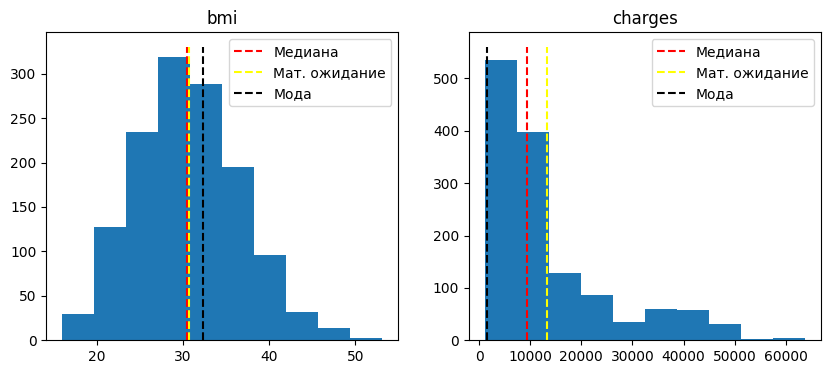

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(insurance_df['bmi'])
axs[0].vlines(insurance_df['bmi'].median(), 0, 330, linestyles='dashed', color='red', label='Медиана')
axs[0].vlines(insurance_df['bmi'].mean(), 0, 330, linestyles='dashed', color='yellow', label='Мат. ожидание')
axs[0].vlines(insurance_df['bmi'].mode(), 0, 330, linestyles='dashed', color='black', label='Мода')
axs[0].set_title('bmi')
axs[0].legend()

axs[1].hist(insurance_df['charges'])
axs[1].vlines(insurance_df['charges'].median(), 0, 560, linestyles='dashed', color='red', label='Медиана')
axs[1].vlines(insurance_df['charges'].mean(), 0, 560, linestyles='dashed', color='yellow', label='Мат. ожидание')
axs[1].vlines(insurance_df['charges'].mode(), 0, 560, linestyles='dashed', color='black', label='Мода')
axs[1].set_title('charges')
axs[1].legend()

plt.show()

## Задание 5

Построить box-plot для числовых показателей. Названия графиков должны
соответствовать названиям признаков. Сделать выводы.


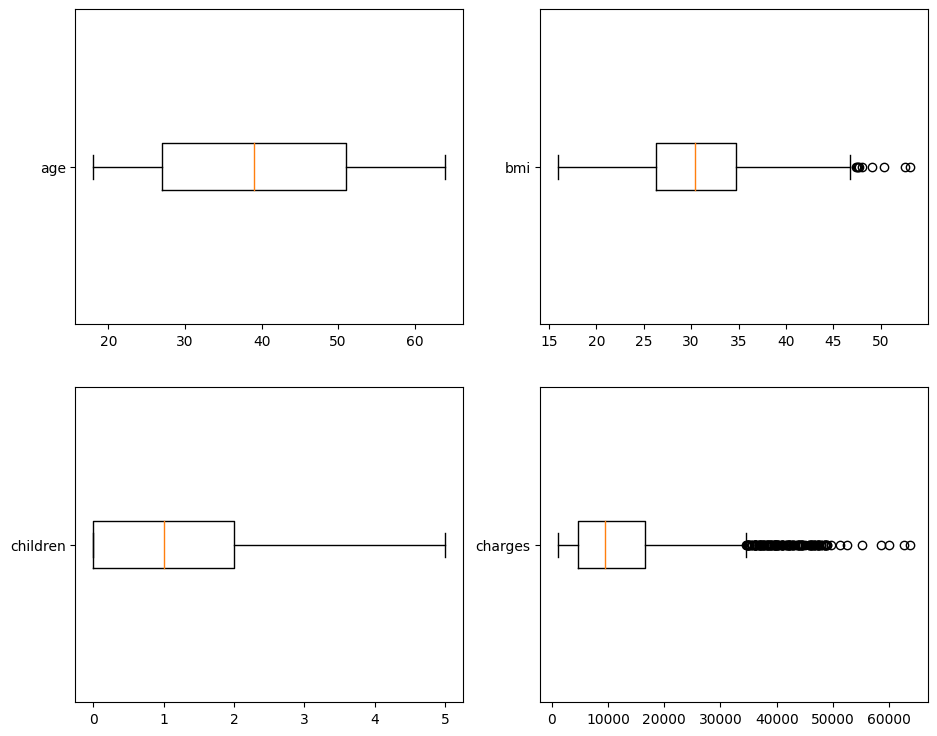

In [ ]:
num_data_list = ['age',	'bmi', 'children', 'charges']

plt.figure(figsize = [11, 9])

for data_idx in range(len(num_data_list)):
  plt.subplot(2, 2, data_idx + 1)
  plt.boxplot([insurance_df[num_data_list[data_idx]]], labels=[num_data_list[data_idx]], vert = False)

plt.show()

## Задание 6

Используя признак charges или bmi, проверить, выполняется ли
центральная предельная теорема. Использовать различные длины выборок
n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти
стандартное отклонение и среднее для полученных распределений.

Напишем функцию для сэмлирования

In [ ]:
def make_sample(df, sample_size, sample_num: int=300):
  sample_list = []
  for key in range(sample_num):
      sample_list.append(df.bmi.sample(n=sample_size, ignore_index=True))
  return sample_list

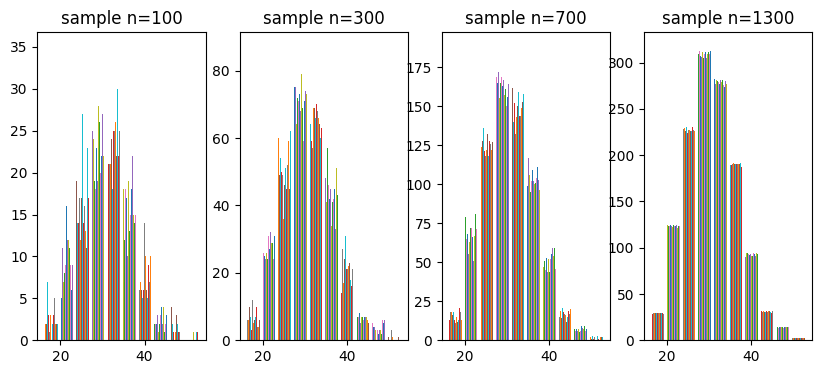

In [ ]:
sample100 = make_sample(insurance_df, 100)
sample300 = make_sample(insurance_df, 300)
sample700 = make_sample(insurance_df, 700)
sample1300 = make_sample(insurance_df, 1300)

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].hist(sample100)
axs[0].set_title('sample n=100')
axs[1].hist(sample300)
axs[1].set_title('sample n=300')
axs[2].hist(sample700)
axs[2].set_title('sample n=700')
axs[3].hist(sample1300)
axs[3].set_title('sample n=1300')

plt.show()

## Задание 7

Построить 95% и 99% доверительный интервал для среднего значения
расходов и среднего значения индекса массы тела.

In [ ]:
interval_bmi_99 = sts.norm.interval(confidence=0.99,
                 loc=np.mean(insurance_df.bmi),
                 scale=sts.sem(insurance_df.bmi))
interval_bmi_95 = sts.norm.interval(confidence=0.90,
                 loc=np.mean(insurance_df.bmi),
                 scale=sts.sem(insurance_df.bmi))
interval_charges_99 = sts.norm.interval(confidence=0.99,
                 loc=np.mean(insurance_df.charges),
                 scale=sts.sem(insurance_df.charges))
interval_charges_95 = sts.norm.interval(confidence=0.95,
                 loc=np.mean(insurance_df.charges),
                 scale=sts.sem(insurance_df.charges))
print(f'Доверительные интервалы среднего значения расходов:\n95% - {interval_charges_95} и 99% - {interval_charges_99} \
        \nДоверительные интервалы среднего значения индекса массы тела:\n95% - {interval_bmi_95} и 99% - {interval_bmi_99}' )

Доверительные интервалы среднего значения расходов:
95% - (12621.54197822916, 13919.302552053354) и 99% - (12417.649014863586, 14123.195515418927)         
Доверительные интервалы среднего значения индекса массы тела:
95% - (30.389176352638128, 30.93761736933497) и 99% - (30.233969458168303, 31.092824263804793)


## Задание 8

Проверить распределения следующих признаков на нормальность: индекс
массы тела, расходы. Сформулировать нулевую и альтернативную
гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать
выводы на основе полученных p-значений.


In [ ]:
bmi_std = sts.zscore(insurance_df.bmi)
test_bmi = sts.kstest(bmi_std, 'norm')
test_bmi

KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394, statistic_location=-0.27697218531780776, statistic_sign=1)

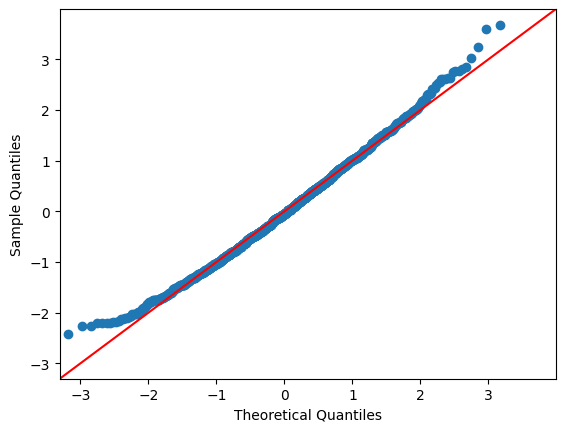

In [ ]:
fig = sm.qqplot(bmi_std, line='45')
plt.show()

In [ ]:
charges_std = sts.zscore(insurance_df.charges)
test_charges = sts.kstest(charges_std, 'norm')
test_charges

KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42, statistic_location=0.016557596433631947, statistic_sign=1)

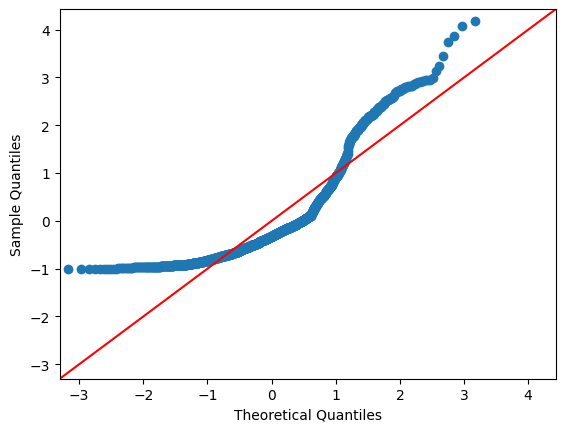

In [ ]:
fig = sm.qqplot(charges_std, line='45')
plt.show()

## Задание 9-10

9. Загрузить данные из файла “ECDCCases.csv”
10. Проверить в данных наличие пропущенных значений. Вывести
количество пропущенных значений в процентах. Удалить два признака, в
которых больше всех пропущенных значений. Для оставшихся признаков
обработать пропуски: для категориального признака использовать
заполнение значением по умолчанию (например, «other»), для числового
признака использовать заполнение медианным значением. Показать, что
пропусков больше в данных нет.


In [ ]:
ecdccases_df = pd.read_csv('ECDCCases.csv')

In [ ]:
for col in ecdccases_df.columns:
  missing = np.mean(ecdccases_df[col].isna()*100)
  print(f' {col} : {round(missing, 1)}%')

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 geoId : 0.4%
 countryterritoryCode : 0.2%
 popData2019 : 0.2%
 continentExp : 0.0%
 Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 : 4.7%


Больший процент пропусков у geoId и Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, удаляем их

In [ ]:
ecdccases_df = ecdccases_df.drop(['geoId','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] ,axis=1)

Для остальных признаков заполним пропуски

In [ ]:
popData2019_med = ecdccases_df.popData2019.median()
ecdccases_df.popData2019.fillna(popData2019_med, inplace=True)

In [ ]:
ecdccases_df.countryterritoryCode.fillna('other', inplace=True)

In [ ]:
for col in ecdccases_df.columns:
  missing = np.mean(ecdccases_df[col].isna()*100)
  print(f' {col} : {round(missing, 1)}%')

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 countryterritoryCode : 0.0%
 popData2019 : 0.0%
 continentExp : 0.0%


## Задание 11

Посмотреть статистику по данным, используя describe(). Сделать выводы
о том, какие признаки содержат выбросы. Посмотреть, для каких стран
количество смертей в день превысило 3000 и сколько таких дней было.
Найти дублирование данных. Удалить дубликаты.

In [ ]:
ecdccases_df.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [ ]:
fig = px.histogram(ecdccases_df, x="cases", title='cases histogram')
fig.show()

In [ ]:
fig = px.histogram(ecdccases_df, x="deaths", title='deaths histogram')
fig.show()

In [ ]:
ecdccases_df[ecdccases_df['deaths'] > 3000]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2118,02/10/2020,2,10,2020,14001,3351,Argentina,ARG,44780675.0,America
16908,07/09/2020,7,9,2020,-8261,3800,Ecuador,ECU,17373657.0,America
37038,09/10/2020,9,10,2020,4936,3013,Mexico,MEX,127575529.0,America
44888,14/08/2020,14,8,2020,9441,3935,Peru,PER,32510462.0,America
44909,24/07/2020,24,7,2020,4546,3887,Peru,PER,32510462.0,America
59007,12/12/2020,12,12,2020,234633,3343,United_States_of_America,USA,329064917.0,America
59009,10/12/2020,10,12,2020,220025,3124,United_States_of_America,USA,329064917.0,America
59016,03/12/2020,3,12,2020,203311,3190,United_States_of_America,USA,329064917.0,America
59239,24/04/2020,24,4,2020,26543,3179,United_States_of_America,USA,329064917.0,America
59245,18/04/2020,18,4,2020,30833,3770,United_States_of_America,USA,329064917.0,America


## Задание 12

Найти дублирование данных. Удалить дубликаты

In [ ]:
ecdccases_df[ecdccases_df.duplicated()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


Удалим их

In [ ]:
ecdccases_df = ecdccases_df.drop_duplicates()

In [ ]:
ecdccases_df[ecdccases_df.duplicated()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp


Больше дубликтов нет

## Задание 13

Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна
выборка – это индекс массы тела людей c региона northwest, вторая
выборка – это индекс массы тела людей с региона southwest. Сравнить
средние значения этих выборок, используя t-критерий Стьюдента.
Предварительно проверить выборки на нормальность (критерий ШопироУилка) и на гомогенность дисперсии (критерий Бартлетта).


In [ ]:
bmi_df = pd.read_csv('bmi.csv')

In [ ]:
bmi_northwest = bmi_df.bmi[bmi_df['region'] == 'northwest']
bmi_southwest = bmi_df.bmi[bmi_df['region'] == 'southwest']

Проверим выборки на нормальность и гомогенность

In [ ]:
northwest_shapiro = sts.shapiro(bmi_northwest)
southwestt_shapiro = sts.shapiro(bmi_southwest)
print(northwest_shapiro, southwestt_shapiro)

ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632) ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)


In [ ]:
sts.bartlett(bmi_northwest, bmi_southwest)

BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)

Сравним средние значения этих выборок, используя t-критерий Стьюдента

In [ ]:
sts.ttest_ind(bmi_northwest, bmi_southwest)

TtestResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695, df=648.0)

## Задание 14

Кубик бросили 600 раз.

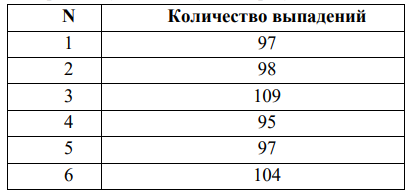

С помощью критерия Хи-квадрат проверить, является ли полученное
распределение равномерным. Использовать функцию
scipy.stats.chisquare().

In [ ]:
sts.chisquare([97, 98,  109, 95,  97, 104])

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

## Задание 15

С помощью критерия Хи-квадрат проверить, являются ли переменные
зависимыми.
Создать датафрейм, используя следующий код:

data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не
работает','На домохозяйстве','На пенсии','Учёба']

Использовать функцию scipy.stats.chi2_contingency().
Влияет ли семейное положение на занятость?

In [ ]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [ ]:
sts.chi2_contingency(data)

Chi2ContingencyResult(statistic=122.29654948595365, pvalue=1.7291616900960234e-21, dof=10, expected_freq=array([[74.664, 68.136, 61.2  ],
       [30.378, 27.722, 24.9  ],
       [24.156, 22.044, 19.8  ],
       [30.744, 28.056, 25.2  ],
       [13.176, 12.024, 10.8  ],
       [ 9.882,  9.018,  8.1  ]]))